In [8]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy  as np

In [42]:
# using hand written digits datasets from keras library
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [43]:
len(X_train)

60000

In [44]:
len(X_test)

10000

In [45]:
X_train[0].shape

(28, 28)

this shows that the image is of 28 * 28 pixels and the weights represented in numbers is a simple 2d array given below

where,
- 0 refers to black points 
- the maximum value of white can be 255

In [46]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

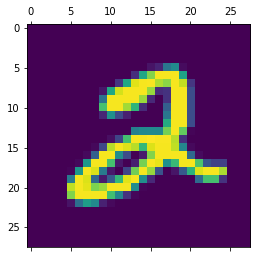

In [47]:
plt.matshow(X_train[5])

In [48]:
y_train[5]

2

In [49]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

now converting 2d array of 28*28  into 1d array for neural network 

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
# now scaling the matrix by dividing with 255 to increase the accuracy
X_train=X_train/255
X_test=X_test/255

In [52]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [53]:
# for X_test
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [54]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## now just creating an neural network 
keeping it simple
#### input layer = 786
#### output layaer = 10

In [55]:
'''
keras.layer.Dense(10,input_shape(784,),activation='sigmoid')
Dense refer that every neurone in a layer is connected to every neuron in second layer
here 10 resers to the number of neuron in output layer and second parameter is for input layer
'''
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 865us/step - loss: 0.4896 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 2s 806us/step - loss: 0.3061 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 888us/step - loss: 0.2855 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.2744 - accuracy: 0.92420s - los
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2676 - accuracy: 0.9265


In [56]:
# now evaluating the accuracy on a test dataset
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 532us/step - loss: 0.2656 - accuracy: 0.9249


[0.265639990568161, 0.9248999953269958]

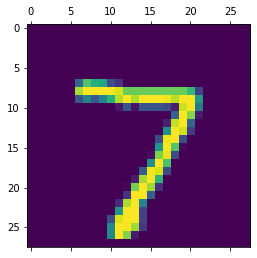

In [58]:
plt.matshow(X_test[0])

In [60]:
y_predicted=model.predict(X_test_flattened)

In [61]:
y_predicted[0]

array([2.39240580e-05, 1.36114911e-10, 4.69761799e-05, 9.97483730e-03,
       1.22805864e-06, 1.08343665e-04, 1.05957532e-09, 7.29724824e-01,
       7.45917278e-05, 8.51333141e-04], dtype=float32)

now it have scored the 10 scores ,now we have to look the maximum score ,

the value which have maximum score ,out neural network have predicted that answer

#### now check the maximum score

In [64]:
np.argmax(y_predicted[0])

7

In [68]:
# building the confusion matrix
y_predicted_labels=[np.argmax(i) for i in y_predicted]# converting predicted value in list

In [71]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    2,    2,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   6,   14,  917,   15,    8,    6,   13,    9,   41,    3],
       [   4,    0,   19,  918,    1,   29,    3,    9,   22,    5],
       [   1,    2,    3,    1,  918,    0,   12,    4,    9,   32],
       [   8,    3,    2,   26,   10,  788,   17,    4,   29,    5],
       [  10,    3,    5,    1,    7,   13,  916,    2,    1,    0],
       [   1,   10,   24,    9,    8,    1,    0,  939,    2,   34],
       [   6,   13,    5,   20,    9,   34,   10,    8,  862,    7],
       [  10,    7,    1,   10,   29,   10,    0,   24,    9,  909]])>

Text(69.0, 0.5, 'Truth')

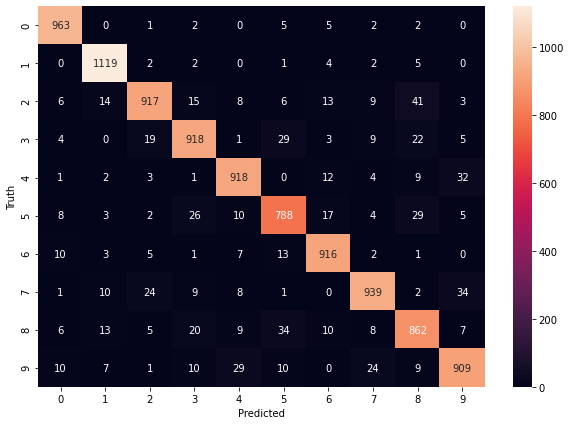

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

we have a little more errors so for this we add
# the hidden layer

In [73]:
 model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),# input layer
    keras.layers.Dense(10, activation='sigmoid')# hidden layer
    # no need to write input shapes in hidden layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3025 - accuracy: 0.9155
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1418 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1014 - accuracy: 0.9704: 0s - loss: 0.1030 - ac
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0803 - accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.9804


In [74]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 727us/step - loss: 0.0923 - accuracy: 0.9730


[0.09230883419513702, 0.9729999899864197]

Text(69.0, 0.5, 'Truth')

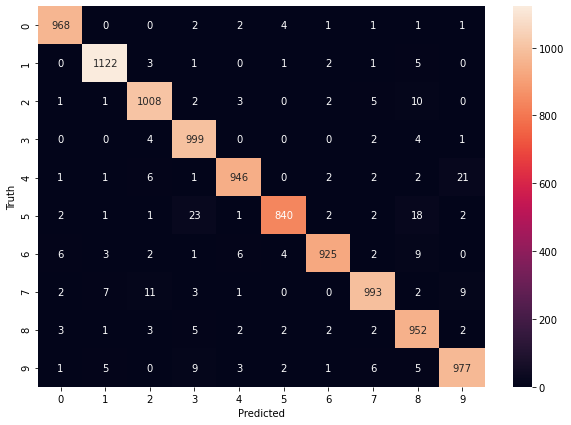

In [75]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now we noticed that the number of errors have been decreased

#### Using Flatten layer so that we don't have to call .reshape on input dataset

In [76]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2985 - accuracy: 0.9176: 0s - los
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1414 - accuracy: 0.9589: 0s - loss: 0.1439 - accuracy: 0.95 - ETA: 0s - loss: 0.1435 - ac
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1020 - accuracy: 0.9696: 0s - loss: 0.1019 - accuracy: 0.96
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0787 - accuracy: 0.9766: 0s - loss: 0.0785 - accuracy: 
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0632 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0529 - accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0439 - accuracy: 0.9866
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0361 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==================

In [77]:
model.evaluate(X_test,y_test)


313/313 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.97 - 0s 788us/step - loss: 0.0867 - accuracy: 0.9757


[0.08667147159576416, 0.9757000207901001]

Text(69.0, 0.5, 'Truth')

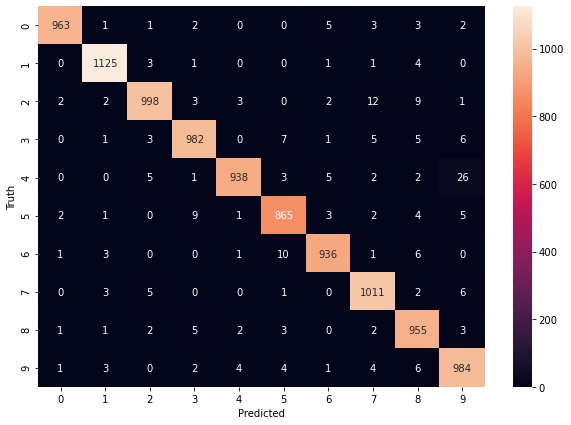

In [80]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')